# Prediction model for banking loan approval

In [1]:
import pandas as pd

In [89]:
df=pd.read_csv("D:/VU/TCS/loandata.csv")

In [4]:
df.isnull().sum()

APP_ID                 0
 CIBIL_SCORE_VALUE     0
NEW_CUST               0
CUS_CATGCODE           0
 EMPLOYMENT_TYPE       0
AGE                    0
 SEX                   0
 NO_OF_DEPENDENTS      0
 MARITAL               0
 EDU_QUA               0
  P_RESTYPE            0
 P_CATEGORY            0
 EMPLOYEE_TYPE         0
  MON_IN_OCC           0
 INCOM_EXP_GMI         0
LTV                    0
 TENURE                0
STATUS                 0
dtype: int64

In [5]:
df.dtypes

APP_ID                   int64
 CIBIL_SCORE_VALUE       int64
NEW_CUST                object
CUS_CATGCODE             int64
 EMPLOYMENT_TYPE         int64
AGE                      int64
 SEX                    object
 NO_OF_DEPENDENTS        int64
 MARITAL                 int64
 EDU_QUA                 int64
  P_RESTYPE              int64
 P_CATEGORY              int64
 EMPLOYEE_TYPE           int64
  MON_IN_OCC             int64
 INCOM_EXP_GMI           int64
LTV                    float64
 TENURE                  int64
STATUS                   int64
dtype: object

In [6]:
df.shape

(13299, 18)

In [7]:
df.columns

Index(['APP_ID', ' CIBIL_SCORE_VALUE ', 'NEW_CUST', 'CUS_CATGCODE ',
       ' EMPLOYMENT_TYPE ', 'AGE', ' SEX  ', ' NO_OF_DEPENDENTS ', ' MARITAL ',
       ' EDU_QUA', '  P_RESTYPE ', ' P_CATEGORY ', ' EMPLOYEE_TYPE ',
       '  MON_IN_OCC ', ' INCOM_EXP_GMI ', 'LTV', ' TENURE ', 'STATUS'],
      dtype='object')

In [8]:
df.columns=df.columns.str.strip()

In [93]:
df['APP_ID'].duplicated().any()

False

In [9]:
df['NEW_CUST']=df['NEW_CUST'].replace({'YES':1, 'NO':0})
df['SEX']=df['SEX'].replace({'F':1, 'M':0})

In [ ]:
# df.to_csv('dfmod.csv')

In [2]:
df=pd.read_csv('dfmod.csv', index_col=0)

In [11]:
df.head()

,CIBIL_SCORE_VALUE,NEW_CUST,CUS_CATGCODE,EMPLOYMENT_TYPE,AGE,SEX,NO_OF_DEPENDENTS,MARITAL,EDU_QUA,P_RESTYPE,P_CATEGORY,EMPLOYEE_TYPE,MON_IN_OCC,INCOM_EXP_GMI,LTV,TENURE,STATUS
0,0,1,1,0,31,1,3,0,0,1,4,2,36,0,0.767104,12,0
1,0,0,1,1,40,1,2,1,1,0,1,1,12,2,0.619077,24,0
2,0,1,1,0,27,1,3,0,0,1,2,2,72,0,0.848949,36,0
3,2,0,1,1,33,0,2,0,1,0,2,1,120,1,0.515646,12,0
4,2,0,1,1,29,1,1,0,1,1,2,1,24,2,0.614123,24,1


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, auc,roc_curve


from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import ComplementNB

from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier


from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Categorical


from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [4]:
X=df.drop('STATUS', axis=1)
y=df[['STATUS']]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Averaging

In [7]:
cmpnb= ComplementNB()
rfc=RandomForestClassifier(random_state=42) 
dt = DecisionTreeClassifier(random_state=42)
etc=ExtraTreesClassifier(random_state=42)

In [20]:
vtng_clf = VotingClassifier(estimators=[('rfc', rfc), ('dt', dt),('cmpnb', cmpnb)], voting='hard')

In [21]:
vtng_clf.fit(X_train, y_train)

C:\Users\Janhavi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Janhavi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier(estimators=[('rfc', RandomForestClassifier(random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('cmpnb', ComplementNB())])

In [22]:
y_pred= vtng_clf.predict(X_test)

In [23]:
cnfmat = confusion_matrix(y_test, y_pred)
cnfmat

array([[1155,  502],
       [ 531,  472]], dtype=int64)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.70      0.69      1657
           1       0.48      0.47      0.48      1003

    accuracy                           0.61      2660
   macro avg       0.58      0.58      0.58      2660
weighted avg       0.61      0.61      0.61      2660



In [25]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

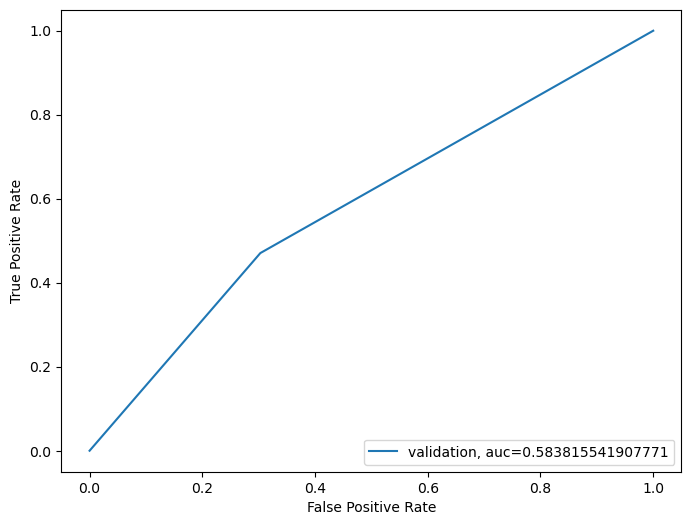

In [27]:
plt.figure(figsize=(8,6)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

## Stacking

In [66]:
stac = StackingClassifier(estimators=[('etc',etc),('rfc', rfc), ('dt', dt)], final_estimator=ComplementNB())

In [67]:
stac.fit(X_train, y_train)

C:\Users\Janhavi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Janhavi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


StackingClassifier(estimators=[('etc', ExtraTreesClassifier(random_state=42)),
                               ('rfc', RandomForestClassifier(random_state=42)),
                               ('dt', DecisionTreeClassifier(random_state=42))],
                   final_estimator=ComplementNB())

In [68]:
y_pred = stac.predict(X_test)

In [69]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.575187969924812


In [70]:
cnfmat = confusion_matrix(y_test, y_pred)
cnfmat

array([[1069,  588],
       [ 542,  461]], dtype=int64)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.65      0.65      1657
           1       0.44      0.46      0.45      1003

    accuracy                           0.58      2660
   macro avg       0.55      0.55      0.55      2660
weighted avg       0.58      0.58      0.58      2660



## Bagging

In [25]:
bag = BaggingClassifier(base_estimator=cmpnb, n_estimators=10)

In [26]:
bag.fit(X_train, y_train)

C:\Users\Janhavi\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Janhavi\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=ComplementNB())

In [27]:
y_pred = bag.predict(X_test)

In [28]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.4718045112781955


In [29]:
cnfmat = confusion_matrix(y_test, y_pred)
cnfmat

array([[ 593, 1064],
       [ 341,  662]], dtype=int64)

## Boosting

In [81]:
boost = AdaBoostClassifier(base_estimator=cmpnb, n_estimators=10, algorithm='SAMME.R')

In [82]:
boost.fit(X_train, y_train)

C:\Users\Janhavi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Janhavi\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=ComplementNB(), n_estimators=10)

In [83]:
y_pred = boost.predict(X_test)

In [84]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.39323308270676693


In [85]:
cnfmat = confusion_matrix(y_test, y_pred)
cnfmat

array([[ 141, 1516],
       [  98,  905]], dtype=int64)

In [80]:
y_test.value_counts()

STATUS
0         1657
1         1003
dtype: int64

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.09      0.15      1657
           1       0.37      0.90      0.53      1003

    accuracy                           0.39      2660
   macro avg       0.48      0.49      0.34      2660
weighted avg       0.51      0.39      0.29      2660



### Conclusion: 
> VotingClassifier display more accuracy w.r.t StackingClassifier. However Complement Naive Bayes as base_estimator for AdaBoostClassifier highly correctly classifies class '1' label data (loan approved) but otherwise show least accuracy in classifying class '0' label data.